<!--
模板使用方法：将此代码块转为Markdown块然后点击左侧三角渲染（依赖 jupyter-wysiwyg ）
模板参数说明：将超链接的路径替换即可
@hyperlink_1: href="https://github.com/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
@hyperlink_2: href="https://nbviewer.org/github/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
注意事项：在 <p>...</p> 中添加注释或者空行等行为会破坏渲染效果
-->

<!-- start of template header -->
<p>
<div style="display:flex">
<a alt="hyperlink_1" title="在Github查看当前文件" href="https://github.com/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/3/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/File-black?logo=github" style="height: 38px"/></a>
<span style="width:5.8px"></span>
<a alt="hyperlink_2" title="在nbviewer查看当前文件" href="https://nbviewer.org/github/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/3/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/nbviewer-white?logo=jupyter" style="height: 38px"/></a>
</div>
</p>

<!-- 避免二次渲染当前块 -->
<!-- 请勿在此处添加内容 -->
<!-- end of template header -->

<h1><span style="color: #b96ad9;">题一 </span></h1>
<blockquote>
<p>中文新闻分类学习，参考：<code>中文新闻分类.txt</code></p>
</blockquote>

In [976]:
import numpy as np
import pandas as pd
CNEWS_DATA_TXT = '../data/3/中文新闻分类.txt'
CNEWS_SPLITED_TXT = 'cnews.jieba.txt'
STOPWORDS_TXT = '../data/3/stopwords.txt'
USERDIC_TXT = 'userdic.txt'

## 定义分词类

In [977]:
import jieba
import warnings, os
from collections import Counter

class ChineseSegmentation:
    ''' base on Leijieba '''
    stopwords = []

    def __init__(self, sentence, stopword_file_path='', user_dict_file_path='', debug=False):
        ''''''
        self.sentence = sentence
        self.debug = debug

        if stopword_file_path != '':
            self.stopwords = [line.strip() for line in open(stopword_file_path, encoding='UTF-8').readlines()]
        else:
            warnings.warn('丫的 stopword_file_path 为空')

        if user_dict_file_path != '':
            jieba.load_userdict(user_dict_file_path)
        else:
            warnings.warn('丫的 user_dict_file_path 为空')

    def _fn_cut_words(self):
        ''''''
        if os.name == 'posix':  # 在 POSIX 系统上启用并行分词加速
            jieba.enable_parallel()
        seg_list = jieba.cut(self.sentence, cut_all=False)
        if self.stopwords:
            output_words = []
            for word in seg_list:
                word = word.strip()
                if word and word not in self.stopwords:
                    output_words.append(word)
        else:
            output_words = list(seg_list)

        return output_words


    def word_frequency(self, chunk_size=2000):
        ''''''
        word_list = self._fn_cut_words()
        word_dict = {}
        for word in word_list:
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
        return sorted(word_dict.items(), key=lambda e:e[1], reverse=True)


    def cut_words_filter(self, frequency_threshold=0, remove_single_word=False):
        '''
        因为只有出现频率大于frequency_threshold的单词才会被保留下来
        如果remove_single_word被设置为True，则单个字符的单词将始终被过滤掉
        优化了数据量大时异常耗时问题，执行速度大幅提升
        '''
        word_list = self._fn_cut_words()
        word_counter = Counter(word_list)
        removed_list = []

        # 对词频进行排序
        word_dict_sorted = dict(sorted(word_counter.items(), key=lambda e: e[1], reverse=True))

        if remove_single_word:
            # 移除单个字符的词语和低频词语
            filtered_word_list = [word for word in word_list if len(word) > 1 and word_dict_sorted[word] > frequency_threshold]
            removed_list = [word for word in word_list if len(word) == 1 or word_dict_sorted[word] <= frequency_threshold]
        else:
            # 仅移除低频词语
            filtered_word_list = [word for word in word_list if word_dict_sorted[word] > frequency_threshold]
            removed_list = [word for word in word_list if word_dict_sorted[word] <= frequency_threshold]


        if self.debug:
            removed_list_len = len(removed_list)
            if 0 < removed_list_len < 50:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list} ')
            elif 50 < removed_list_len:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list[:20]} \n ... \n {removed_list[-20:]} ')

            print('-'*10)

            filtered_word_list_len = len(filtered_word_list)
            if 0 < filtered_word_list_len < 100:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list} ')
            elif 100 < filtered_word_list_len:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list[:40]} \n ... \n {filtered_word_list[-40:]} ')


        return filtered_word_list


## 数据处理

In [978]:
txtfile = pd.read_csv(CNEWS_DATA_TXT, sep='\t', encoding = 'utf-8', header = None)
txtfile

,0,1,2,3
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...
...,...,...,...,...
4995,时尚,常吃六类食物快速补充水分,http://lady.people.com.cn/GB/18248366.html,随着天气逐渐炎热，补水变得日益重要。据美国《跑步世界》杂志报道，喝水并不是为身体补充水分的唯...
4996,时尚,情感：你是我的那盘菜 吃不起我走【２】,http://lady.people.com.cn/n/2012/0712/c1014-18...,我其实不想说这些话刺激他，他也是不得已。可是，我又该怎样说，怎样做？我只能走，离开这个伤心地...
4997,时尚,揭秘不老女神刘晓庆的四任丈夫（图）,http://lady.people.com.cn/n/2012/0730/c1014-18...,５８岁刘晓庆最新嫩照Ｏ衷诘牧跸庆绝对看不出她已经５８岁了，她绝对可以秒杀刘亦菲、范冰冰这类美...
4998,时尚,样板潮爸 时尚圈里的父亲们,http://lady.people.com.cn/GB/18215232.html,导语：做了爸爸就是一种幸福，无论是领养还是亲生，更何况出现在影视剧中。时尚圈永远是需要领军人...


In [979]:
# 要包括第三列的内容啊，不然只用第一列的标题建模的精度不到 0.8
txtfile[1] = txtfile[1].apply(lambda x: x + ' ' + str(txtfile[3][txtfile[txtfile[1] == x].index[0]]))

In [980]:
import re
for i in range(len(txtfile)):
    txtfile[1][i] = re.sub(r'[^\u4e00-\u9fa5]+',' ',txtfile[1][i])
txtfile[1].replace(' ', np.nan, inplace=True)
print(txtfile[1].isnull().sum())
txtfile.dropna(subset=txtfile.columns.tolist()[1], inplace=True)
txtfile.reset_index(drop=True, inplace=True)
print(txtfile[1].isnull().sum())
# 此处直接替换了 txtfile ，重新运行需要先运行前置单元格
txtfile[1]

2
0


0       新辉腾 座加长 版 款 最新报价 经销商 电话 试驾 订车 憬杭州滨江区江陵路 号 转 保常...
1                                          概念车 呼叫热线 服务邮箱 
2       日内瓦亮相 性能版 概念车 引擎 品牌在二月曾经公布了最新的 新概念车 效果图 不过现在在日...
3       清仓大甩卖一汽夏利 威志 低至 万 清仓大甩卖 一汽夏利 威志 低至 万 日 启新中国一汽强...
4       大众敞篷家族新成员 高尔夫敞篷版实拍 在今年 月的日内瓦车展上 我们见到了高尔夫家族的新成员...
                              ...                        
4993    常吃六类食物快速补充水分 随着天气逐渐炎热 补水变得日益重要 据美国 跑步世界 杂志报道 喝...
4994    情感 你是我的那盘菜 吃不起我走 我其实不想说这些话刺激他 他也是不得已 可是 我又该怎样说...
4995    揭秘不老女神刘晓庆的四任丈夫 图 岁刘晓庆最新嫩照 衷诘牧跸庆绝对看不出她已经 岁了 她绝对...
4996    样板潮爸 时尚圈里的父亲们 导语 做了爸爸就是一种幸福 无论是领养还是亲生 更何况出现在影视...
4997    全球最美女人长啥样 中国最美女人酷似章子怡 图 全球最美女人合成图 国整形外科教授李承哲 在...
Name: 1, Length: 4998, dtype: object

In [981]:
userdic = 'QQ694357845QQ'
with open(USERDIC_TXT,'w', encoding='utf-8') as f:
    f.write(userdic)
s = userdic.join(list(txtfile[1]))
m = ChineseSegmentation(s, STOPWORDS_TXT, USERDIC_TXT, 1)


耗时处理，耐心等候……




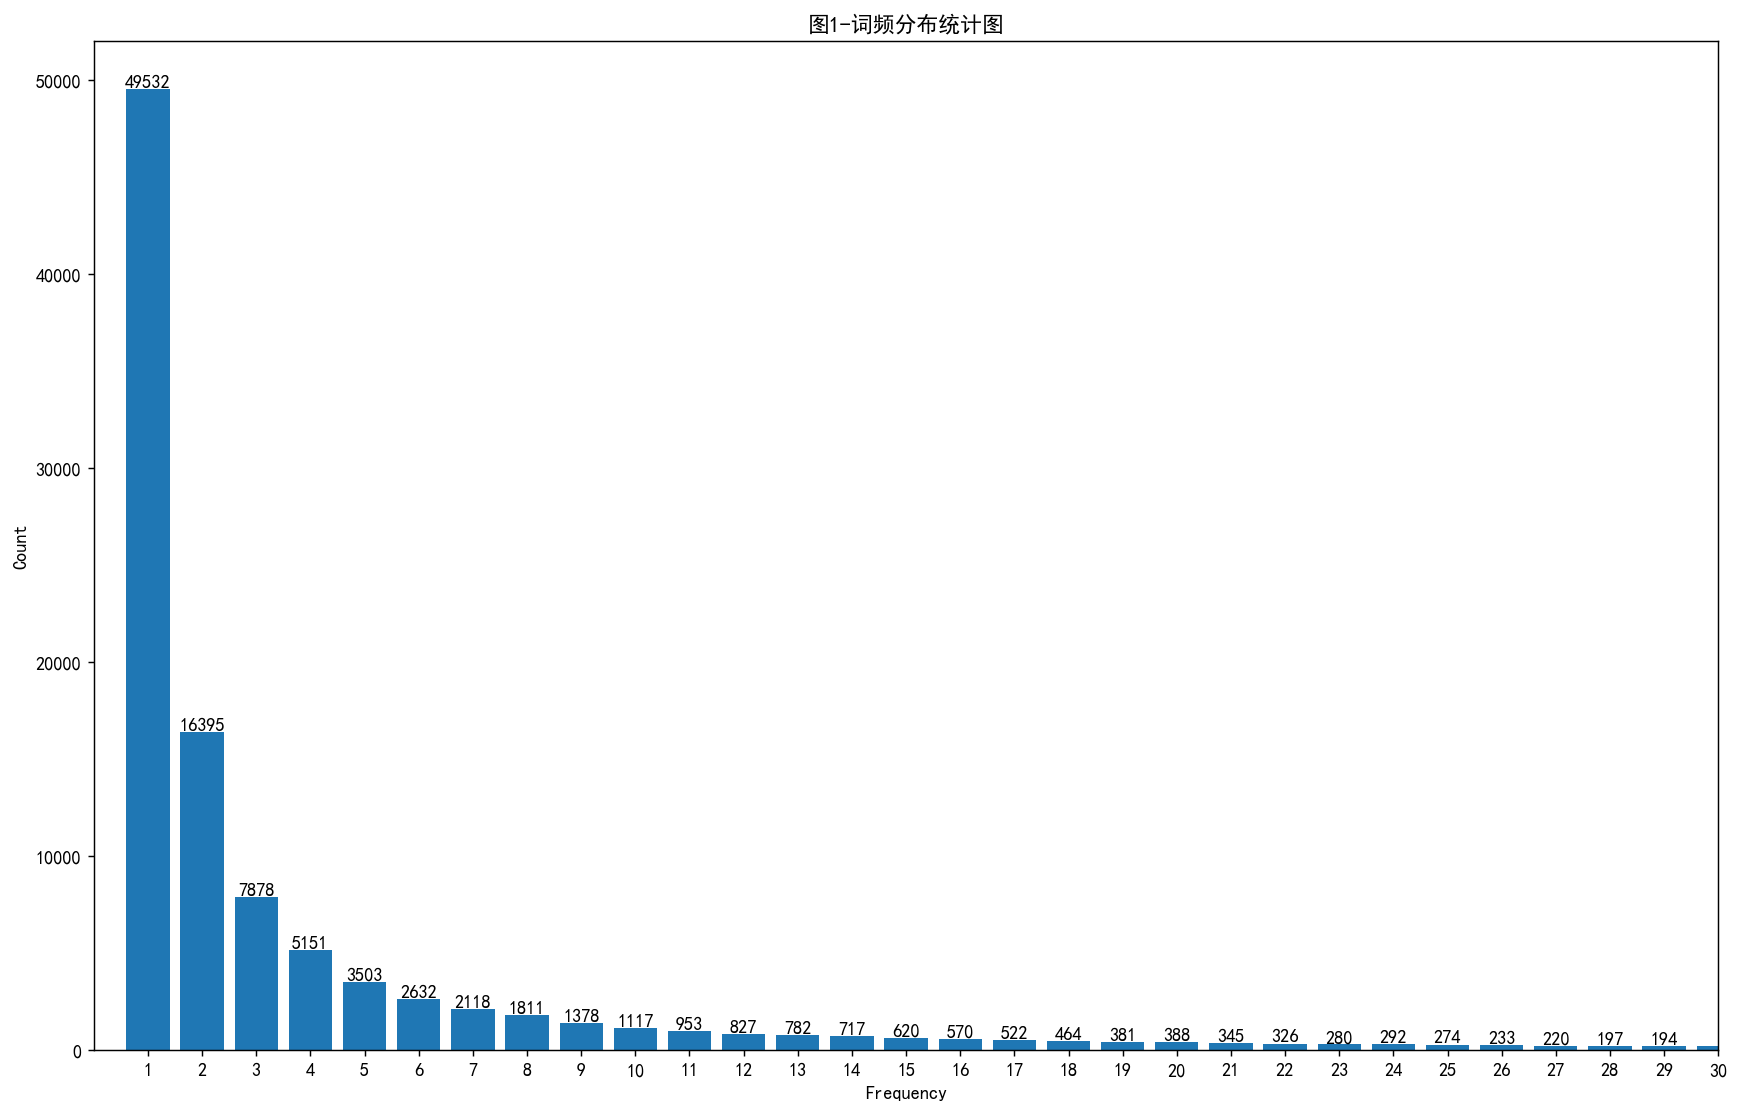

In [982]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']   # 防止中文标签乱码
CANVAS = lambda x : plt.figure(figsize=(16, 10), dpi=x)  # 设置画布
print('耗时处理，耐心等候……')
word_count = dict(m.word_frequency())
del word_count[userdic]
print()
count = {}
for value in word_count.values():
    if value not in count:
        count[value] = 1
    else:
        count[value] += 1
print()
# 绘制频数统计图
CANVAS(131)
plt.bar(count.keys(), count.values())
plt.title('图1-词频分布统计图')
plt.xlabel('Frequency')
plt.ylabel('Count')
# 显示每条柱形图的具体数值
for x, y in zip(count.keys(), count.values()):
    if 0 <= x < 30:   # 只在x轴范围为0到29的情况下显示数值
        plt.text(x, y, str(y), ha='center', va='bottom')
plt.xticks(list(count.keys()))  # 设置x轴刻度
plt.xlim(0, 30)   # 设置x轴显示范围
plt.show()
# print(sorted(count.items(),key=lambda e:e[1],reverse=1))

In [983]:
print('耗时处理，耐心等候……')
filtered_word_list = m.cut_words_filter(1, 1)

s1 = ' '.join(filtered_word_list)

with open(CNEWS_SPLITED_TXT,'w', encoding='utf-8') as f:
    f.write(s1.replace(f'{userdic}','\n'))
print('-'*10)
with open(CNEWS_SPLITED_TXT,'r', encoding='utf-8') as f:
    print(f'\t write {len(f.readlines())} lines to {CNEWS_SPLITED_TXT}')
print()

耗时处理，耐心等候……
----------
	 filtered_word_list : ( 755001 ) 
 ['加长', '最新', '报价', '经销商', '电话', '试驾', '订车', '杭州', '保常', '自魄', '白云', '大道北', '广州市', '天河区', '黄埔', '大道', '富力', '盈泰', '大厦', '保常福', '淄博市', '张店区', '山泉', '保常', '保税区', '黄海', '三路', '保玻埃', '纺锨', '复兴路', '保常', '云南', '昆明市', '度假区', '滇池', '保常', '川市', '兴庆区', '丽景', '北街'] 
 ... 
 ['学术', '杂志', '美容', '整形外科', '学会', '学报', '发表', '种族', '民族', '脸型', '多样性', '黑人', '白人', '中国', '日本', '女性', '最具', '魅力', '脸型', '论文', '李承哲', '合成', '脸型', '采用', '脸型', '黑人', '白人', '中国', '日本', '脸型', '黑人', '美女', '白人', '美女', '中国', '美女', '日本', '美女', '韩国', '美女'] 
----------
	 write 4998 lines to cnews.jieba.txt



C:\Windows\Temp\ipykernel_15332\2261473325.py:81: UserWarning: 	 removed_list from filtered_word_list : ( 209632 ) 
 ['新辉腾', '座', '版', '款', '憬', '滨江区', '江陵', '路', '号', '转', '叮', '万', '阒', '菔', '邪', '号', '西', '号', '室', '转'] 
 ... 
 ['玻', '款', '雅痞', '型', '秀', '长', '样', '图', '国', '演艺人', '名', '名', '名', '名', '名', '贾凶', '宰笙', '蛴', '乙来', '挝'] 
  warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list[:20]} \n ... \n {removed_list[-20:]} ')


In [984]:
txt = pd.read_csv(CNEWS_SPLITED_TXT, sep='\t', encoding = 'utf-8', header = None, skip_blank_lines=False) # skip_blank_lines=False 禁用跳过空行，否则会导致下面train_test_split 的 X 和 y 行数不一致
txt

,0
0,加长 最新 报价 经销商 电话 试驾 订车 杭州 保常 自魄 白云 大道北 广州市 天河区 ...
1,概念车 呼叫 热线 服务 邮箱
2,日内瓦 亮相 性能 概念车 引擎 品牌 二月 公布 最新 概念车 效果图 日内瓦 车展 品...
3,清仓 甩卖 一汽 夏利 威志 低至 清仓 甩卖 一汽 夏利 威志 低至 启新 中国 一汽 ...
4,大众 敞篷 家族 成员 高尔夫 敞篷版 实拍 日内瓦 车展 见到 高尔夫 家族 成员 高尔...
...,...
4993,常吃 食物 快速 补充 水分 天气 炎热 补水 变得 美国 跑步 世界 杂志 报道 喝水 ...
4994,情感 吃不起 不想 刺激 只能 离开 伤心地 想起 一句 命中 命中 强求 只能 安慰 担...
4995,揭秘 不老 女神 刘晓庆 丈夫 刘晓庆 最新 嫩照 牧跸 看不出 秒杀 刘亦菲 范冰冰 美...
4996,样板 潮爸 时尚 圈里 父亲 导语 爸爸 一种 幸福 无论是 领养 亲生 更何况 影视剧 ...


## 训练模型

In [997]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', lowercase = False)
vectorizer.fit(list(txt[0]))
X = vectorizer.transform(list(txt[0]))
X.shape

(4998, 52158)

In [998]:
# 生成类别列表
categories = txtfile[0].unique()
ordering = list(categories)
print(ordering)

# 将类别列表中的类别名转化为对应的序号
y = np.array(txtfile[0].map(lambda x: ordering.index(x)))
y.shape

['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚']


(4998,)

In [1031]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.111, random_state=31)

In [1032]:
# 朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [1033]:
# 逻辑回归
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

## 结果分析

In [1034]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
t = classification_report(y_test, y_pred, target_names = ordering)
print(t)

              precision    recall  f1-score   support

          汽车       1.00      1.00      1.00        53
          财经       0.78      0.91      0.84        57
          科技       0.86      0.91      0.88        46
          健康       0.81      0.85      0.83        60
          体育       0.94      1.00      0.97        51
          教育       0.93      0.89      0.91        61
          文化       0.84      0.60      0.70        53
          军事       0.95      0.87      0.91        62
          娱乐       0.67      0.89      0.76        54
          时尚       0.89      0.67      0.76        58

    accuracy                           0.86       555
   macro avg       0.87      0.86      0.86       555
weighted avg       0.87      0.86      0.86       555



<p><span style="font-size: 14pt;">macro avg 即使用宏平均值（average='macro'）来计算模型的性能指标</span></p>
<p><span style="font-size: 14pt;">weighted avg 即使用加权平均值（average='weighted'）来计算模型的性能指标</span></p>
<p><span style="font-size: 14pt;"><span style="font-size: 18.6667px;">accuracy、precision、recall 、f1-score&nbsp;分别表示计算模型在测试集上的准确率、精确率、召回率和 F1 值</span></span></p>

<p><span style="font-size: 14pt; color: #e67e23;">结果显示，该模型在汽车领域的预测效果最好，在文化领域则较差</span></p>
<p>&nbsp;</p>